## By: Vardhaman R P
    
  ### for dataset and problem description  
  ###  visit https://github.com/vardhaman-datascience/People-Charm-Machine-learning-classification-

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import confusion_matrix


In [4]:
from IPython.display import Image, display

In [5]:
data=pd.read_csv('E:/Data_Science/Assignments/machine_learning/Assignment2_PGD B7/Assignment2_PGD B7/People Charm case.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfactoryLevel        14999 non-null float64
lastEvaluation           14999 non-null float64
numberOfProjects         14999 non-null int64
avgMonthlyHours          14999 non-null int64
timeSpent.company        14999 non-null int64
workAccident             14999 non-null int64
left                     14999 non-null int64
promotionInLast5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [42]:
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [8]:
len(data)

14999

In [48]:
len(data[data.duplicated()])

3008

### My god there are 3008 duplicate records in the data so we need to eliminate these to avoid overfitting  

In [62]:
data=data.drop_duplicates(subset=None, keep='first', inplace=False)

In [63]:
len(data)

11991

In [64]:
data.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


# EDA

### satisfactory level v/s leaving the job

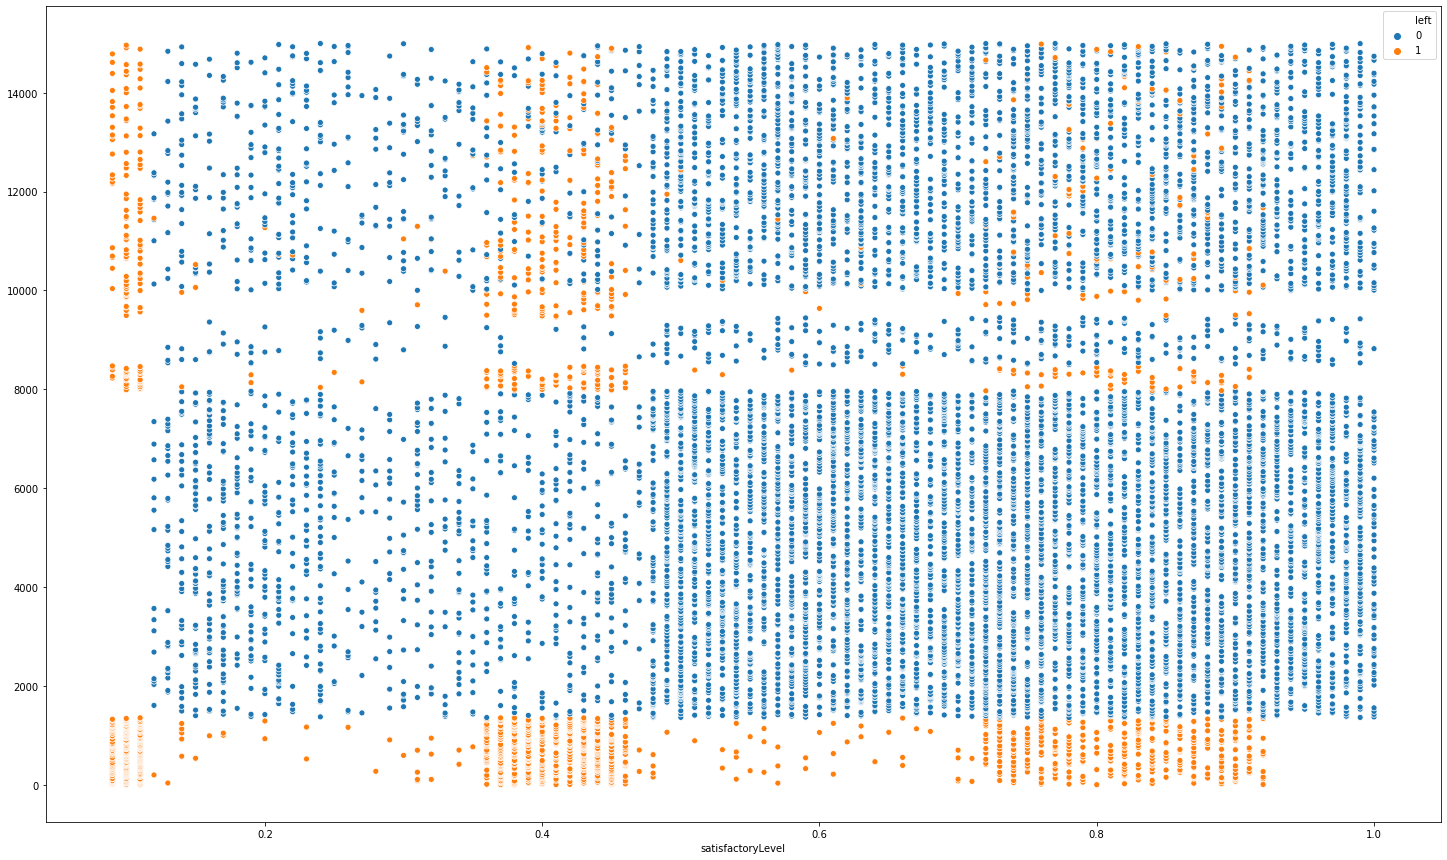

In [65]:
plt.figure(figsize=(25,15))
sb.scatterplot(data['satisfactoryLevel'],data.index,data['left'])

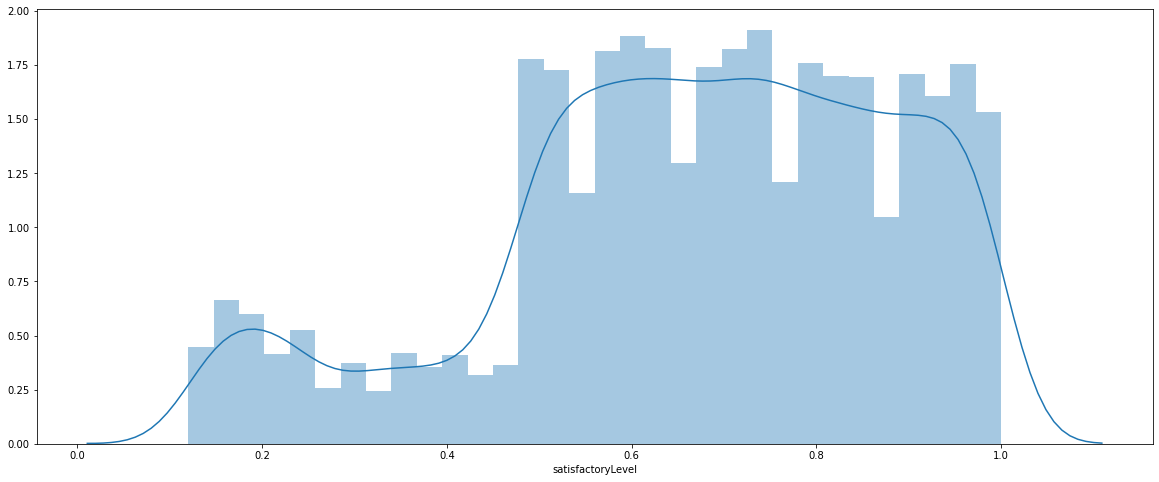

In [66]:
plt.figure(figsize=(20,8))
sb.distplot(data[data['left']==0]['satisfactoryLevel'])

### we can observe more no of high satisfactory people are not leaving the job comare to low satisfactory people

#   

## lastEvaluation v/s leaving the job

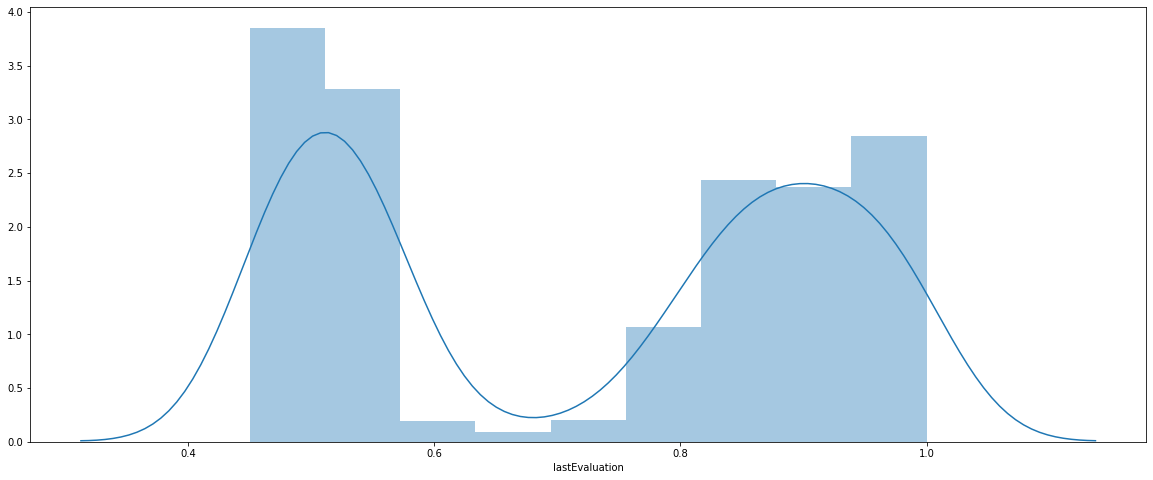

In [67]:
plt.figure(figsize=(20,8))
sb.distplot(data[data['left']==1]['lastEvaluation'])

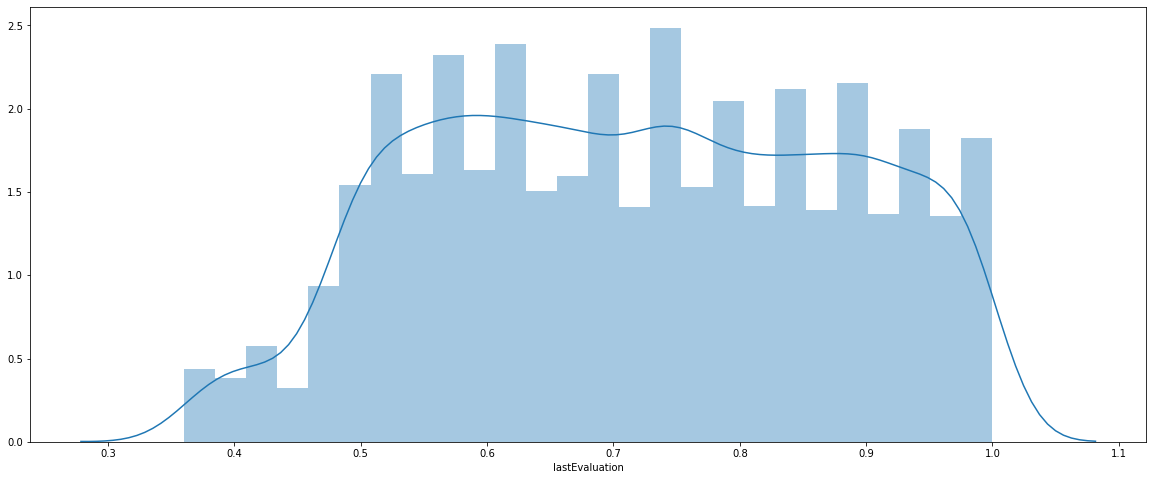

In [68]:
plt.figure(figsize=(20,8))
sb.distplot(data[data['left']==0]['lastEvaluation'])

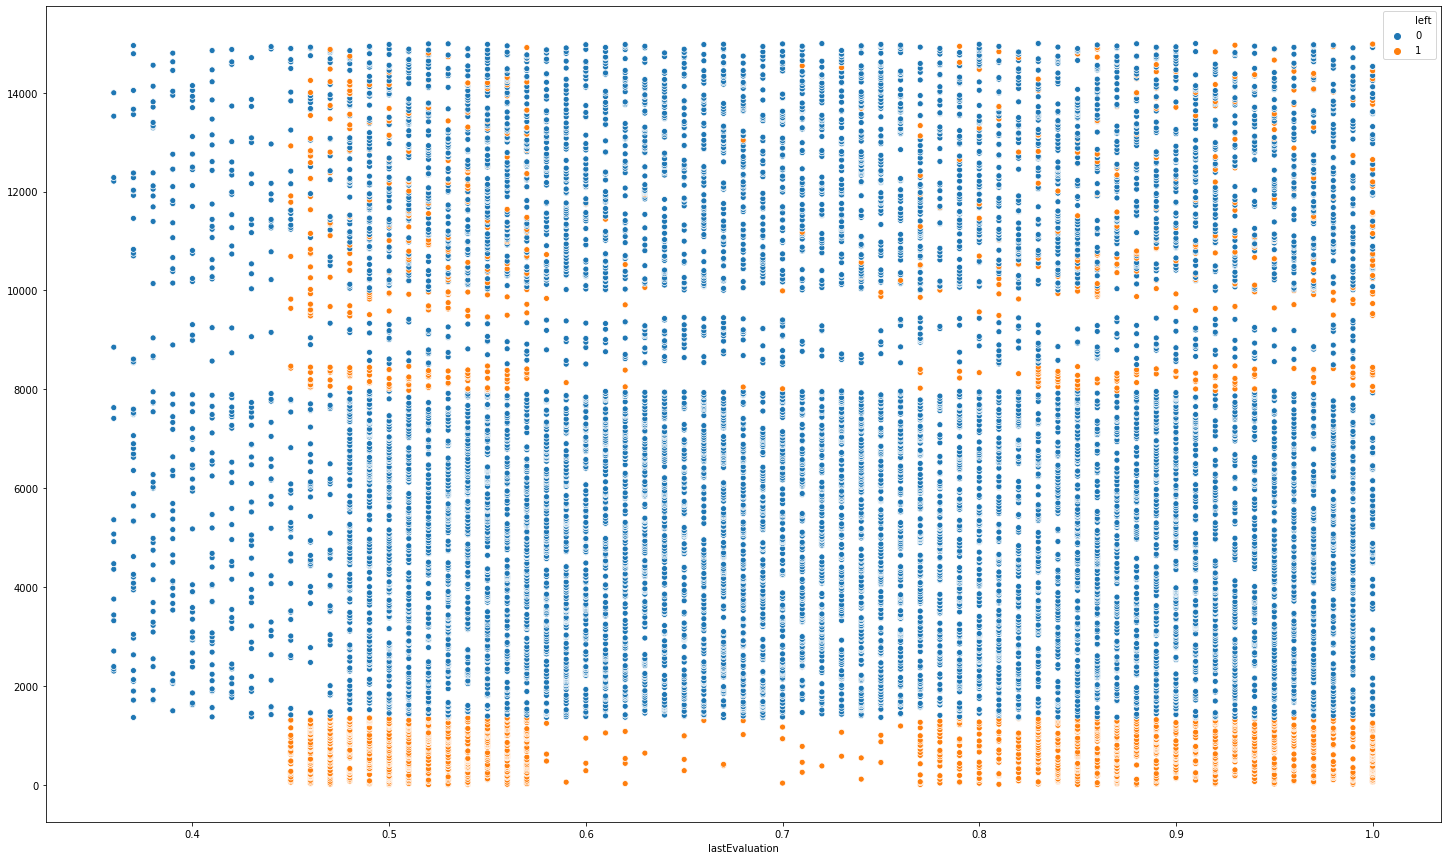

In [69]:
plt.figure(figsize=(25,15))
sb.scatterplot(data['lastEvaluation'],data.index,data['left'])

### this is evenly distributed so last evaluation not much significant for prediction of weather a perticular employees leaves the job or not

#    

## numberOfProjects v/s leaving the job

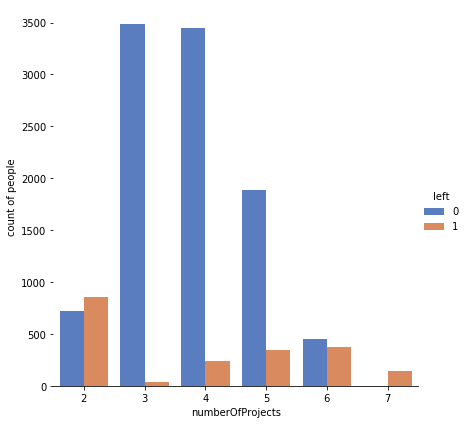

In [70]:
a=pd.DataFrame(data.groupby(['numberOfProjects','left'])['left'].count())
a.columns=['count']
b=a.reset_index()
g =sb.catplot(x='numberOfProjects', y='count', hue='left', data=b,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("count of people")

## we are not finding much relation between no of project and people leaving the job

#  

## avgMonthlyHours v/s leaving the job

In [71]:
data[data['avgMonthlyHours']<=data['avgMonthlyHours'].mean()].groupby('left')['left'].count()

left
0    5135
1     910
Name: left, dtype: int64

In [72]:
data[data['avgMonthlyHours']>=data['avgMonthlyHours'].mean()].groupby('left')['left'].count()

left
0    4865
1    1081
Name: left, dtype: int64

### there are almost  equal no of people leaving the job whoose avg monthly working hours is less and more than avg

#    

## dept v/s leaving the job

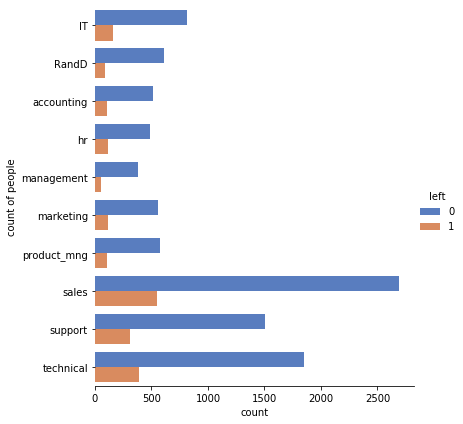

In [73]:
b=pd.DataFrame(data.groupby(['dept','left'])['left'].count())
b.columns=['count']
b=b.reset_index()
g =sb.catplot(y='dept', x='count', hue='left', data=b,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("count of people")

## salary v/s leaving the job

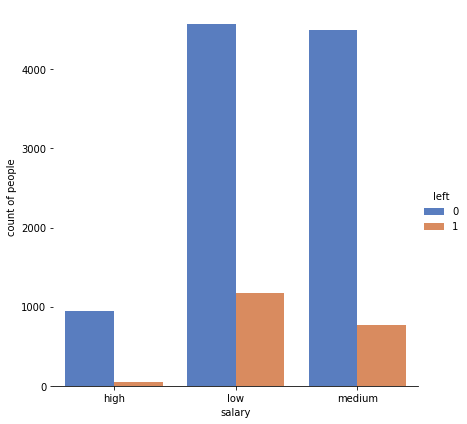

In [74]:
b=pd.DataFrame(data.groupby(['salary','left'])['left'].count())
b.columns=['count']
b=b.reset_index()
g =sb.catplot(y='count', x='salary', hue='left', data=b,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("count of people")

## low salary people are leaving the job most 

In [75]:
data.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

## There are no null values in this data 


###   

In [76]:
data1=pd.get_dummies(data,prefix='_a')

In [77]:
data1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,_a_IT,_a_RandD,...,_a_hr,_a_management,_a_marketing,_a_product_mng,_a_sales,_a_support,_a_technical,_a_high,_a_low,_a_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [78]:
X1=data1.drop('left',axis=1)
Y=data1['left']

#   

# Z-score Normalization

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X2=sc.fit_transform(X1)
X=pd.DataFrame(X2)
X.columns=X1.columns
X.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,_a_IT,_a_RandD,_a_accounting,_a_hr,_a_management,_a_marketing,_a_product_mng,_a_sales,_a_support,_a_technical,_a_high,_a_low,_a_medium
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,-0.427116,-0.131228,-0.297668,-0.247855,-0.233704,-0.229708,-0.194249,-0.24385,-0.246335,1.643797,-0.42315,-0.479817,-0.299986,1.043563,-0.884151
1,0.706637,0.851380,1.029194,1.262709,1.981036,-0.427116,-0.131228,-0.297668,-0.247855,-0.233704,-0.229708,-0.194249,-0.24385,-0.246335,1.643797,-0.42315,-0.479817,-0.299986,-0.958255,1.131028
2,-2.155721,0.970190,2.748604,1.467939,0.477485,-0.427116,-0.131228,-0.297668,-0.247855,-0.233704,-0.229708,-0.194249,-0.24385,-0.246335,1.643797,-0.42315,-0.479817,-0.299986,-0.958255,1.131028
3,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,-0.427116,-0.131228,-0.297668,-0.247855,-0.233704,-0.229708,-0.194249,-0.24385,-0.246335,1.643797,-0.42315,-0.479817,-0.299986,1.043563,-0.884151
4,-0.911218,-1.287206,-1.549921,-0.974300,-0.274291,-0.427116,-0.131228,-0.297668,-0.247855,-0.233704,-0.229708,-0.194249,-0.24385,-0.246335,1.643797,-0.42315,-0.479817,-0.299986,1.043563,-0.884151


In [96]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

### Logistic Regression 

In [97]:
from sklearn.linear_model import LogisticRegression

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LRR Score= 84.36848686952897


confusion Matrix is:
[[1943   64]
 [ 311   81]]


Area under the curve: 0.8433874297102997




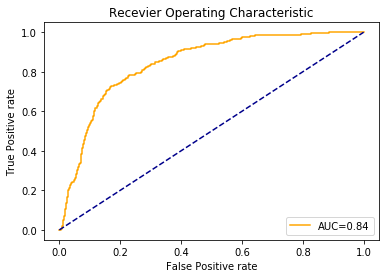

In [98]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_predict=lr.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('LRR Score=',lr.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=lr.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

# KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

KNN Score= 94.70612755314714


confusion Matrix is:
[[1936   71]
 [  56  336]]


Area under the curve: 0.9458343501825245




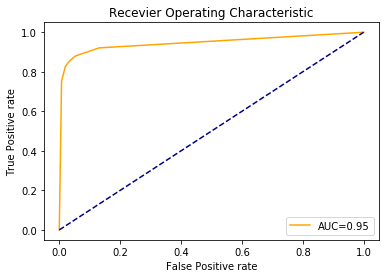

In [100]:
KN=KNeighborsClassifier()
KN.fit(X_train,Y_train)
Y_predict=KN.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('KNN Score=',KN.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=KN.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

# naive_bayes

In [101]:
from sklearn.naive_bayes import GaussianNB

GNB Score= 75.53147144643602


confusion Matrix is:
[[1492  515]
 [  72  320]]


Area under the curve: 0.8345751604079599




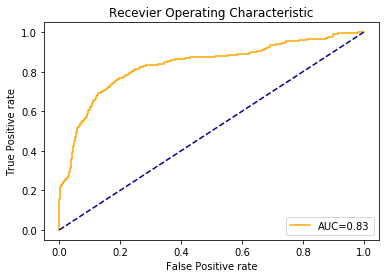

In [102]:
GNB=GaussianNB()
GNB.fit(X_train,Y_train)
Y_predict=GNB.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('GNB Score=',GNB.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=GNB.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

# DecisionTreeClassifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

DT Score= 96.62359316381826


confusion Matrix is:
[[1957   50]
 [  31  361]]


Area under the curve: 0.9480027810825377




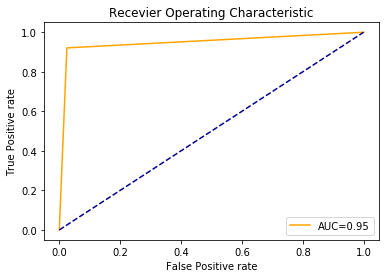

In [104]:
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)
Y_predict=DT.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('DT Score=',DT.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=DT.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

In [105]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

# AdaBoostClassifier

ADB Score= 96.24843684868696


confusion Matrix is:
[[1964   43]
 [  47  345]]


Area under the curve: 0.9781587149059923




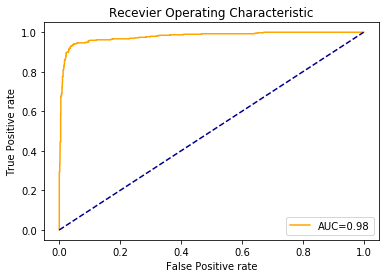

In [106]:
ADB=AdaBoostClassifier()
ADB.fit(X_train,Y_train)
Y_predict=ADB.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('ADB Score=',ADB.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=ADB.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show() 

## GradientBoostingClassifier

GBC Score= 98.0408503543143


confusion Matrix is:
[[1988   19]
 [  28  364]]


Area under the curve: 0.9871749895772958




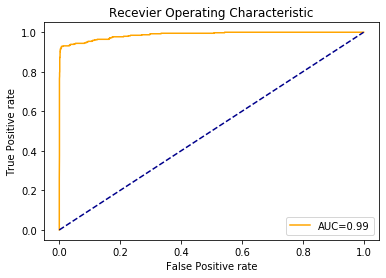

In [107]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,Y_train)
Y_predict=GBC.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('GBC Score=',GBC.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=GBC.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show() 

In [108]:
from xgboost import XGBClassifier

XGB Score= 98.0408503543143


confusion Matrix is:
[[1991   16]
 [  31  361]]


Area under the curve: 0.9861873748004433




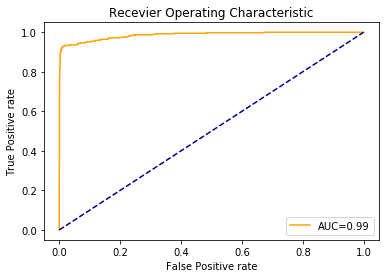

In [109]:
XGB=XGBClassifier()
XGB.fit(X_train,Y_train)
Y_predict=XGB.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('XGB Score=',XGB.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=XGB.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show() 

## RandomForestClassifier

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFC Score= 98.20758649437266


confusion Matrix is:
[[2000    7]
 [  36  356]]


Area under the curve: 0.9679800545031166




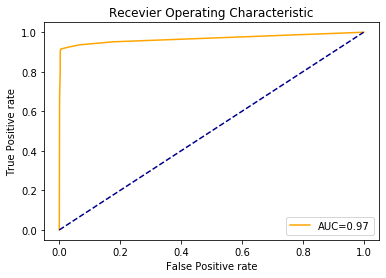

In [110]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
Y_predict=RFC.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('RFC Score=',RFC.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=RFC.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

#    

## •	Do you feel accuracy is a good performance evaluation metric for the given data? If yes, justify your answer. If no, justify your answer and suggest alternative metric/s.

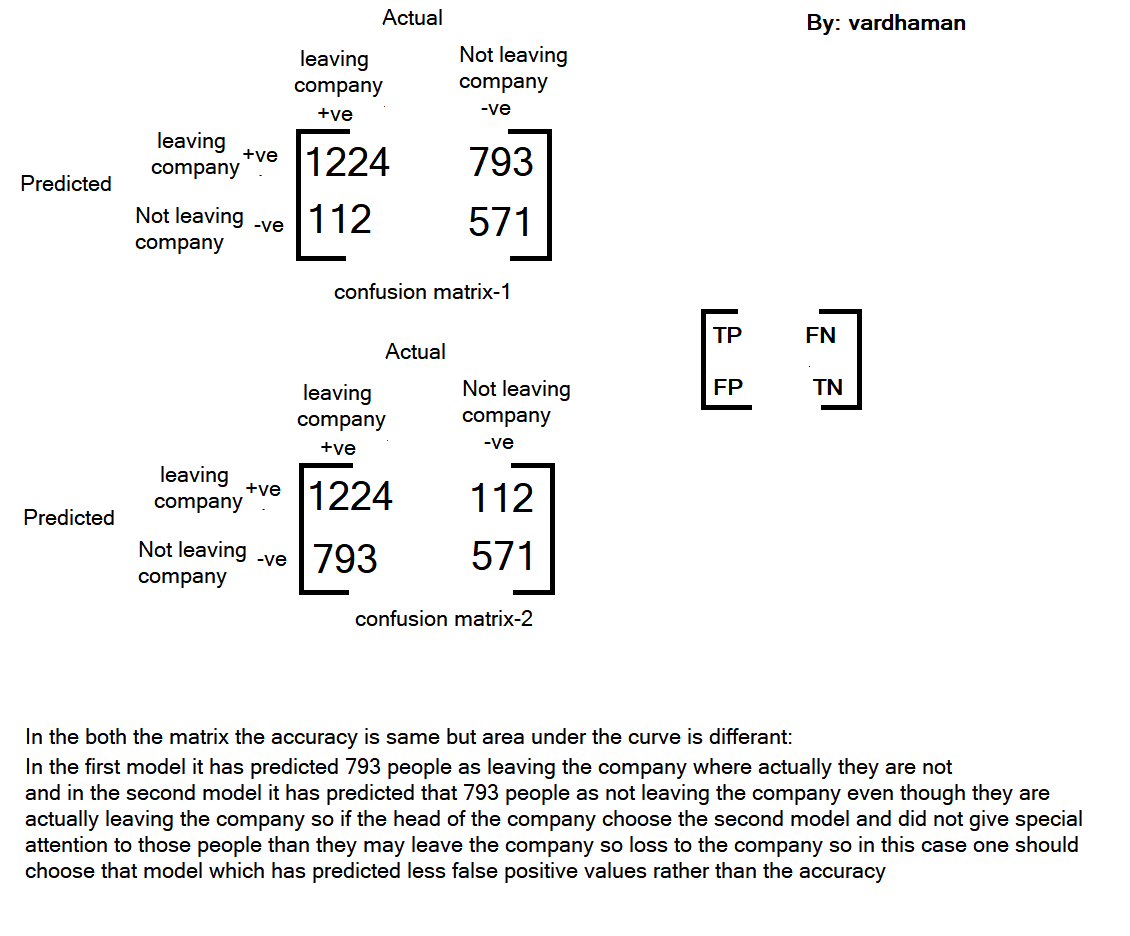

In [111]:
  display(Image(filename='E:/Data_Science/machine learning/notes images/confu.png'))

## GradientBoostingClassifier and RandomForestClassifier gives almost same accuracy of 98.0408503543143 and 98.20758649437266 respectively, but we need to choose the model which has high area under the curve where False positive prediction  value for GradientBoostingClassifier model is good 